# 



### **Installing Libraries**

In [2]:
!pip install ts2vg
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **Importing Libraries**

In [3]:
import pandas as pd
from ts2vg import HorizontalVG as hvg, NaturalVG as vg
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import os
import seaborn as sns


1. Apply natural visibility graph (NVG) and horizontal visibility graph (HVG) to the aforementioned data

2. Compute average degree, network diameter, and average path length

3. For the above computations select sample size of 1024 data points ( from 1000
to 2024) for each of the 15 time series

4. Tabulate all the results

5. Generate  scatter plots: average degree vs network diameter and color the points according to walking and running (do this for each accelerometer signal and each method (HVH and NVG))

6. Generate  scatter plots: average degree vs network diameter and color the points according to climbing up and climbing down (do this for each accelerometer signal and each method (HVH and NVG))

# Natural Visibility Graph 

Formally the visibility criteria is established using the criteria -

  Two arbitary data values (Ta,Ya) and (Tb,Yb) will have visibility, and consequently will become two connected nodes of associated graph, if any other data (Tc,Yc) placed between them fulfills - 

          Yc < Yb + (Ya -Yb)*(Tb-Tc)/(Tb-Ta)
     

Source : From time series to complex networks: The visibility graph , Lucas Lacasa, Bartolo Luque, Fernando Ballesteros, and Juan Carlos Nuño
(Paper shared on Canvas) 

# Horizontal Visibility Graph

The horizontal visibility algorithm maps time series into graphs and it is defined as -
  
  Let {Xi}i = 1...N be a time series of N data. The algorithm assigns each data of the series to a node in horizontak visibility grapgh. Two nodes i and j in the graph are connected if one can draw a horizontal line in the series joining Xi and Xj that does not intersect any intermediate data height. Hence, i and j are two connected nodes if the geometrical criterion is fulfilled within time series -

  Xi,Xj > Xn for all n , i<n<j


Source- Horizontal visibility graphs: exact results for random time series:B. Luque1, L. Lacasa1, F. Ballesteros2, and J. Luque3∗
1Dpto. Matem ́atica Aplicada y Estad ́ıstica, ETSI Aeron ́auticos,
Universidad Polit ́ecnica de Madrid, Spain2Observatorio Astron ́omico,
Universidad de Valencia, Spain3Dept de Teoria del Senyal i Comunicacions,
Universitat Polit`ecnica de Catalunya, Spain

(Paper shared on Canvas)

### **Creating two dataframes to store final results for Head and Chest for task 1**

In [4]:
head_results_task1 = pd.DataFrame(columns = ['Method', 'Subject','Accelerometer Axis','Average Degree', 'Network Diameter', 'Average Path Length','Activity'])
chest_results_task1 = pd.DataFrame(columns = ['Method', 'Subject','Accelerometer Axis','Average Degree', 'Network Diameter', 'Average Path Length','Activity'])

### **Mounting Google Drive**

In [5]:
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Project_2_Data'
dir = '/content/drive/MyDrive/Project_2_Data'

Mounted at /content/drive
/content/drive/MyDrive/Project_2_Data


### **Creating table for Body Part: Head**

In [6]:
list_of_no_of_subjects = list(range(1,16))

methods = ['HVG', 'NVG']
axis = ['x', 'y', 'z']
different_activity_list = ['walking', 'running', 'climbingup', 'climbingdown']

for u in range(len(list_of_no_of_subjects)):
  for s in range(len(methods)):
    for t in range(len(axis)):
      for v in range(len(different_activity_list)):
        try:
          folder = "acc_" + different_activity_list[v] + "_csv"
          filen = "acc_" + different_activity_list[v] + "_head.csv"
          path_name = '/content/drive/MyDrive/Project_2_Data' + "/" + "Subject-" + str(list_of_no_of_subjects[u]) + "/" + folder + "/" + filen

          tdf = pd.read_csv(path_name)
          if methods[s] == 'HVG':
            p = hvg()
          else:
            p = vg()
          p.build(tdf["attr_" + axis[t]][1000:2024])
          l = p.as_igraph()
          avg_deg = np.mean(l.degree())
          net_diam = l.diameter()
          apl = l.average_path_length()
          head_results_task1 = head_results_task1.append({'Method': methods[s], 'Subject': list_of_no_of_subjects[u],'Accelerometer Axis': axis[t],'Average Degree': avg_deg, 'Network Diameter': net_diam, 'Average Path Length': apl,'Activity': different_activity_list[v]}, ignore_index= True)

        except Exception as e:
          continue

### **Creating table for Body Part: Chest**

In [7]:
list_of_no_of_subjects = list(range(1,16))

methods = ['HVG', 'NVG']
axis = ['x', 'y', 'z']
different_activity_list = ['walking', 'running', 'climbingup', 'climbingdown']

for u in range(len(list_of_no_of_subjects)):
  for s in range(len(methods)):
    for t in range(len(axis)):
      for v in range(len(different_activity_list)):
        try:
          folder = "acc_" + different_activity_list[v] + "_csv"
          filen = "acc_" + different_activity_list[v] + "_chest.csv"
          path_name = '/content/drive/MyDrive/Project_2_Data' + "/" + "Subject-" + str(list_of_no_of_subjects[u]) + "/" + folder + "/" + filen # path to read the files from the drive

          tdf = pd.read_csv(path_name) 

          if methods[s] == 'HVG':
            p = hvg()
          else:
            p = vg()
          p.build(tdf["attr_" + axis[t]][1000:2024])
          l = p.as_igraph()
          avg_deg = np.mean(l.degree())
          net_diam = l.diameter()
          apl = l.average_path_length()
          chest_results_task1 = chest_results_task1.append({'Method': methods[s], 'Subject': list_of_no_of_subjects[u],'Accelerometer Axis': axis[t],'Average Degree': avg_deg, 'Network Diameter': net_diam, 'Average Path Length': apl,'Activity': different_activity_list[v]}, ignore_index= True)

        except Exception as e:
          continue

###**Tables showing data for Subjects 1-15 for Head**

In [8]:
head_results_task1

,Method,Subject,Accelerometer Axis,Average Degree,Network Diameter,Average Path Length,Activity
0,HVG,1,x,3.949219,35,16.403747,walking
1,HVG,1,x,3.953125,31,10.856393,running
2,HVG,1,x,3.943359,38,16.030484,climbingup
3,HVG,1,x,3.923828,38,13.302396,climbingdown
4,HVG,1,y,3.966797,24,10.074499,walking
...,...,...,...,...,...,...,...
355,NVG,15,y,14.203125,11,4.388028,climbingdown
356,NVG,15,z,13.353516,9,4.674661,walking
357,NVG,15,z,8.447266,11,4.786348,running
358,NVG,15,z,12.654297,9,4.601635,climbingup


### **Tables showing data for Subjects 1-15 for Chest**

In [9]:
chest_results_task1

,Method,Subject,Accelerometer Axis,Average Degree,Network Diameter,Average Path Length,Activity
0,HVG,1,x,3.958984,26,11.578024,walking
1,HVG,1,x,3.962891,22,7.543843,running
2,HVG,1,x,3.957031,35,15.409904,climbingup
3,HVG,1,x,3.951172,32,14.510884,climbingdown
4,HVG,1,y,3.951172,22,10.666252,walking
...,...,...,...,...,...,...,...
355,NVG,15,y,14.156250,15,5.840334,climbingdown
356,NVG,15,z,9.318359,12,4.945985,walking
357,NVG,15,z,8.017578,9,4.651544,running
358,NVG,15,z,10.123047,10,4.766421,climbingup


### **Plotting scatter plots where Activity is either Walking or Running**

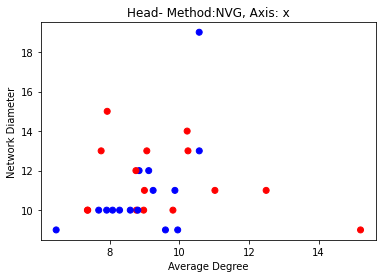

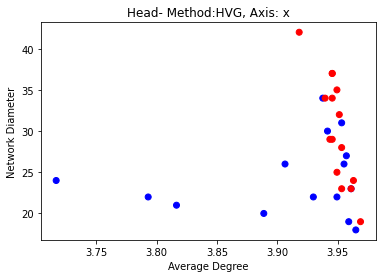

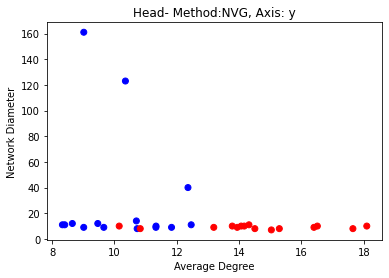

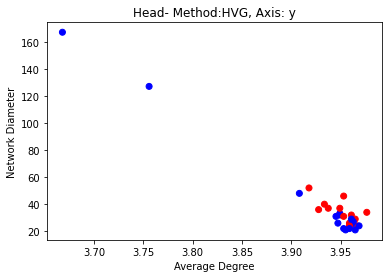

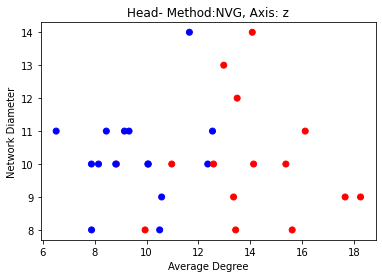

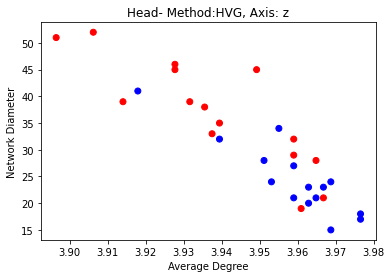

In [10]:
#Selecting only results for Running or Walking
x_list = head_results_task1.query('Activity == "walking" or Activity == "running"' )
selected_activities = ['walking', 'running']
colors = {}
i = 0
while i < len(selected_activities):
  colors[selected_activities[i]] = ['red', 'blue'][i]
  i = i + 1

axis = ['x', 'y', 'z']
method = ['NVG', 'HVG']
for k in axis:
  for l in method:
    td = x_list[(x_list['Accelerometer Axis'] == k) & (x_list['Method'] == l )]
    plt.scatter(td['Average Degree'], td['Network Diameter'], color = td['Activity'].map(colors) )
    plt.title('Head- Method:' +l+ ',' + ' Axis: ' + k )
    plt.xlabel('Average Degree')
    plt.ylabel('Network Diameter')
    plt.show()

### **Plotting Scatter plots where activity is Climbing up or Climbing down**

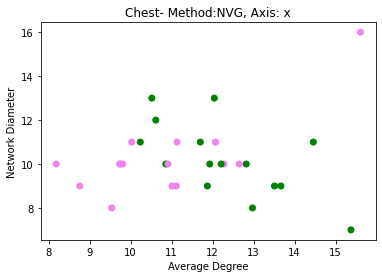

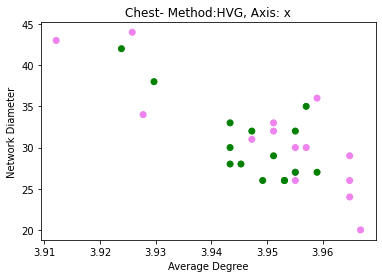

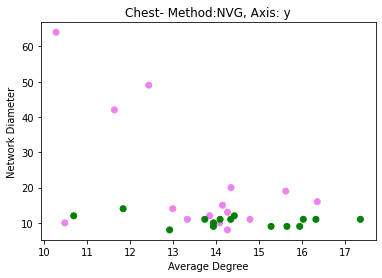

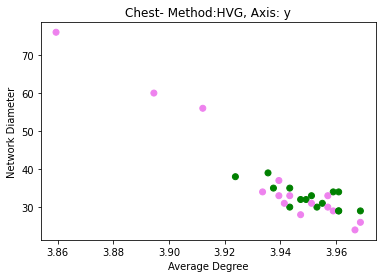

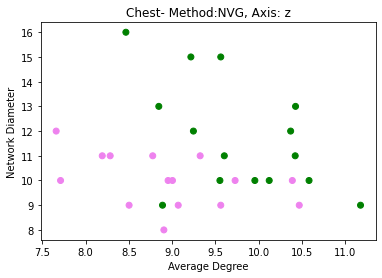

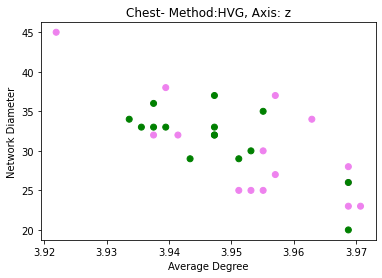

In [11]:
#Selecting only results for climbingup or climbingdown
y_list = chest_results_task1.query('Activity == "climbingup" or Activity == "climbingdown"' )
selected_activities = ['climbingup', 'climbingdown']
colors = {}
i = 0
while i < len(selected_activities):
  colors[selected_activities[i]] = ['green', 'violet'][i]
  i = i + 1

axis = ['x', 'y', 'z']
method = ['NVG', 'HVG']
for k in axis:
  for l in method:
    td_1 = y_list[(y_list['Accelerometer Axis'] == k) & (y_list['Method'] == l )]
    plt.scatter(td_1['Average Degree'], td_1['Network Diameter'], color = td_1['Activity'].map(colors) )
    plt.title('Chest- Method:' +l+ ',' + ' Axis: ' + k )
    plt.xlabel('Average Degree')
    plt.ylabel('Network Diameter')
    plt.show()


1. Compute permutation entropy and complexity for the aforementioned data.
Consider the accelerometer data in all three directions

2. Vary the following parameters
    Embedded Dimension 3, 4, 5, 6
    Embedded Delay 1, 2, 3
    Signal length 1024, 2048, 4096

3. Generate scatter plots:  permutation entropy vs complexity and color the points according to walking and running (for signal length =4096, embedded delay = 1, and embedded dimension = 3, 4, 5, 6, and all three accelerometer directions)

4. Generate  scatter plots: permutation entropy vs complexity and color the points according to climbing up and climbing down (for signal length =4096, embedded delay = 1, and embedded dimension = 3, 4, 5, 6, all three accelerometer
directions)

In [12]:
# Source - https://github.com/srk-srinivasan/Permutation-Entropy/blob/master/p_entropy.py
# This module has functions for computation of permutation entropy and its variations.
def s_entropy(freq_list):
    ''' This function computes the shannon entropy of a given frequency distribution.
    USAGE: shannon_entropy(freq_list)
    ARGS: freq_list = Numeric vector representing the frequency distribution
    OUTPUT: A numeric value representing shannon's entropy'''
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):
    ''' This function computes the ordinal patterns of a time series for a given embedding dimension and embedding delay.
    USAGE: ordinal_patterns(ts, embdim, embdelay)
    ARGS: ts = Numeric vector representing the time series, embdim = embedding dimension (3<=embdim<=7 prefered range), embdelay =  embdding delay
    OUPTUT: A numeric vector representing frequencies of ordinal patterns'''
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:]) 
    

def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def complexity(op):
    ''' This function computes the complexity of a time series defined as: Comp_JS = Q_o * JSdivergence * pe
    Q_o = Normalizing constant
    JSdivergence = Jensen-Shannon divergence
    pe = permutation entopry
    ARGS: ordinal pattern'''
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

def weighted_ordinal_patterns(ts, embdim, embdelay):
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    xm = np.mean(partition, axis=1)
    weight = np.mean((partition - xm[:, None])**2, axis=1)
    permutation = np.argsort(partition)
    idx = _hash(permutation)
    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = sum(weight[i == idx])

    return list(counts[counts != 0]) 

In [24]:
list_of_no_of_subjects = list(range(1,16))
axis = ['x', 'y', 'z']
different_activity_list = ['walking', 'running', 'climbingup', 'climbingdown']
body_parts = ["head","chest"]
results=pd.DataFrame(columns=['Subject','Signal Length','Dimension','Delay','Permutation Entropy','Complexity','Activity','Body Position'])
for u in range(len(list_of_no_of_subjects)):
   for v in range(len(different_activity_list)):
     for part in range(len(body_parts)):
      for t in range(len(axis)):
        #Signal Length
        for sig_len in [1024,2048,4096]: 
          # Embeddded Dimension
          for embd_dimen in range(3,7):
            #Embedded Delay
            for embd_delay in range(1,4):
              try:
                folder = "acc_" + different_activity_list[v] + "_csv"
                filen = "acc_" + different_activity_list[v] + "_"+ str(body_parts[part]) + ".csv"
                path_name = '/content/drive/MyDrive/Project_2_Data' + "/" + "Subject-" + str(list_of_no_of_subjects[u]) + "/" + folder + "/" + filen

                tdf = pd.read_csv(path_name)
                ts=(tdf["attr_"+axis[t]][0:sig_len])
                op=ordinal_patterns(ts,embd_dimen,embd_delay)  # Using predefined function to get list of ordinal patterns
                pe=p_entropy(op) # to get permutation entrophy from defined function p_entropy()
                comp=complexity(op) # To get complexity from the function Complexity()
                results=results.append({'Subject':list_of_no_of_subjects[u],'Accelerometer axis':axis[t],'Signal Length':sig_len,'Dimension':embd_dimen,'Delay':embd_delay,'Permutation Entropy':pe,'Complexity':comp,'Activity':different_activity_list[v],'Body Position':body_parts[part]},ignore_index=True)
              except Exception as e:
                continue

In [25]:
results

,Subject,Signal Length,Dimension,Delay,Permutation Entropy,Complexity,Activity,Body Position,Accelerometer axis
0,1,1024,3,1,0.775745,0.171051,walking,head,x
1,1,1024,3,2,0.879580,0.101684,walking,head,x
2,1,1024,3,3,0.943963,0.050110,walking,head,x
3,1,1024,4,1,0.692641,0.239437,walking,head,x
4,1,1024,4,2,0.827176,0.178617,walking,head,x
...,...,...,...,...,...,...,...,...,...
12955,15,4096,5,2,0.942501,0.094303,climbingdown,chest,z
12956,15,4096,5,3,0.972191,0.050053,climbingdown,chest,z
12957,15,4096,6,1,0.844734,0.238611,climbingdown,chest,z
12958,15,4096,6,2,0.935939,0.135029,climbingdown,chest,z


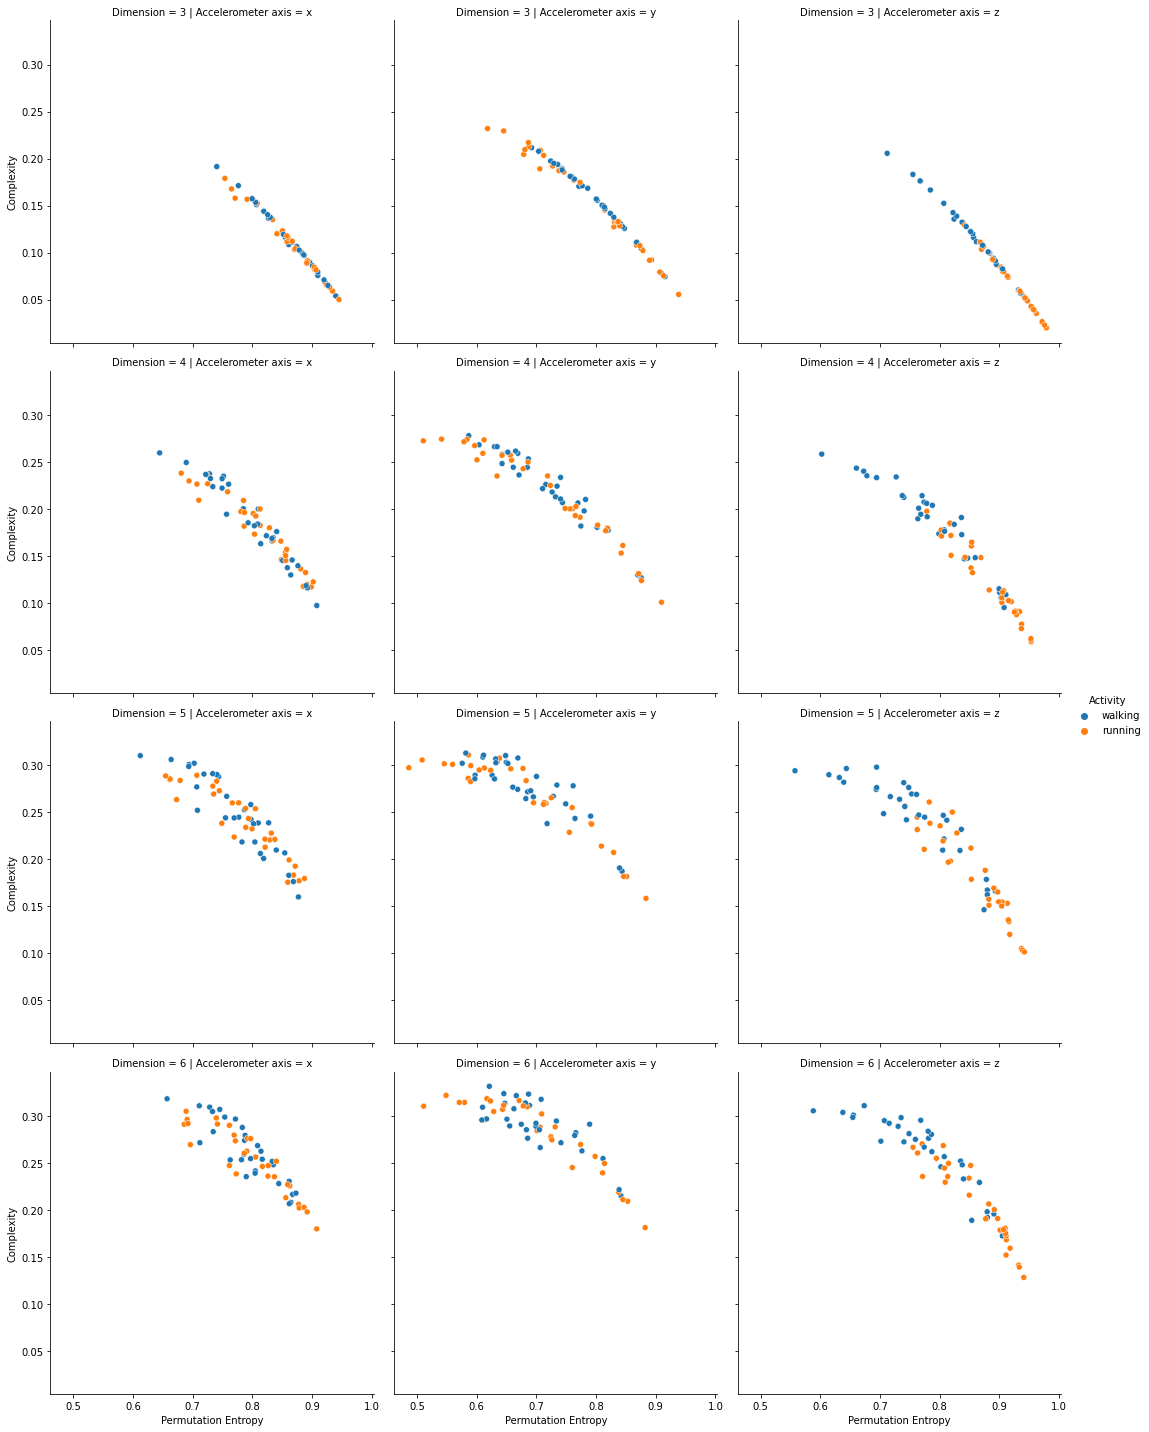

In [26]:
# Plotting graphs for the activities Walking ans running
walk_rng = results[(results['Activity']=='running') | (results['Activity']=='walking')]
w_rn_data = walk_rng[(walk_rng['Signal Length']==4096) & (walk_rng['Delay']==1)]
sns.relplot(data=w_rn_data,x='Permutation Entropy',y='Complexity',hue='Activity',col='Accelerometer axis',row='Dimension')
plt.show()

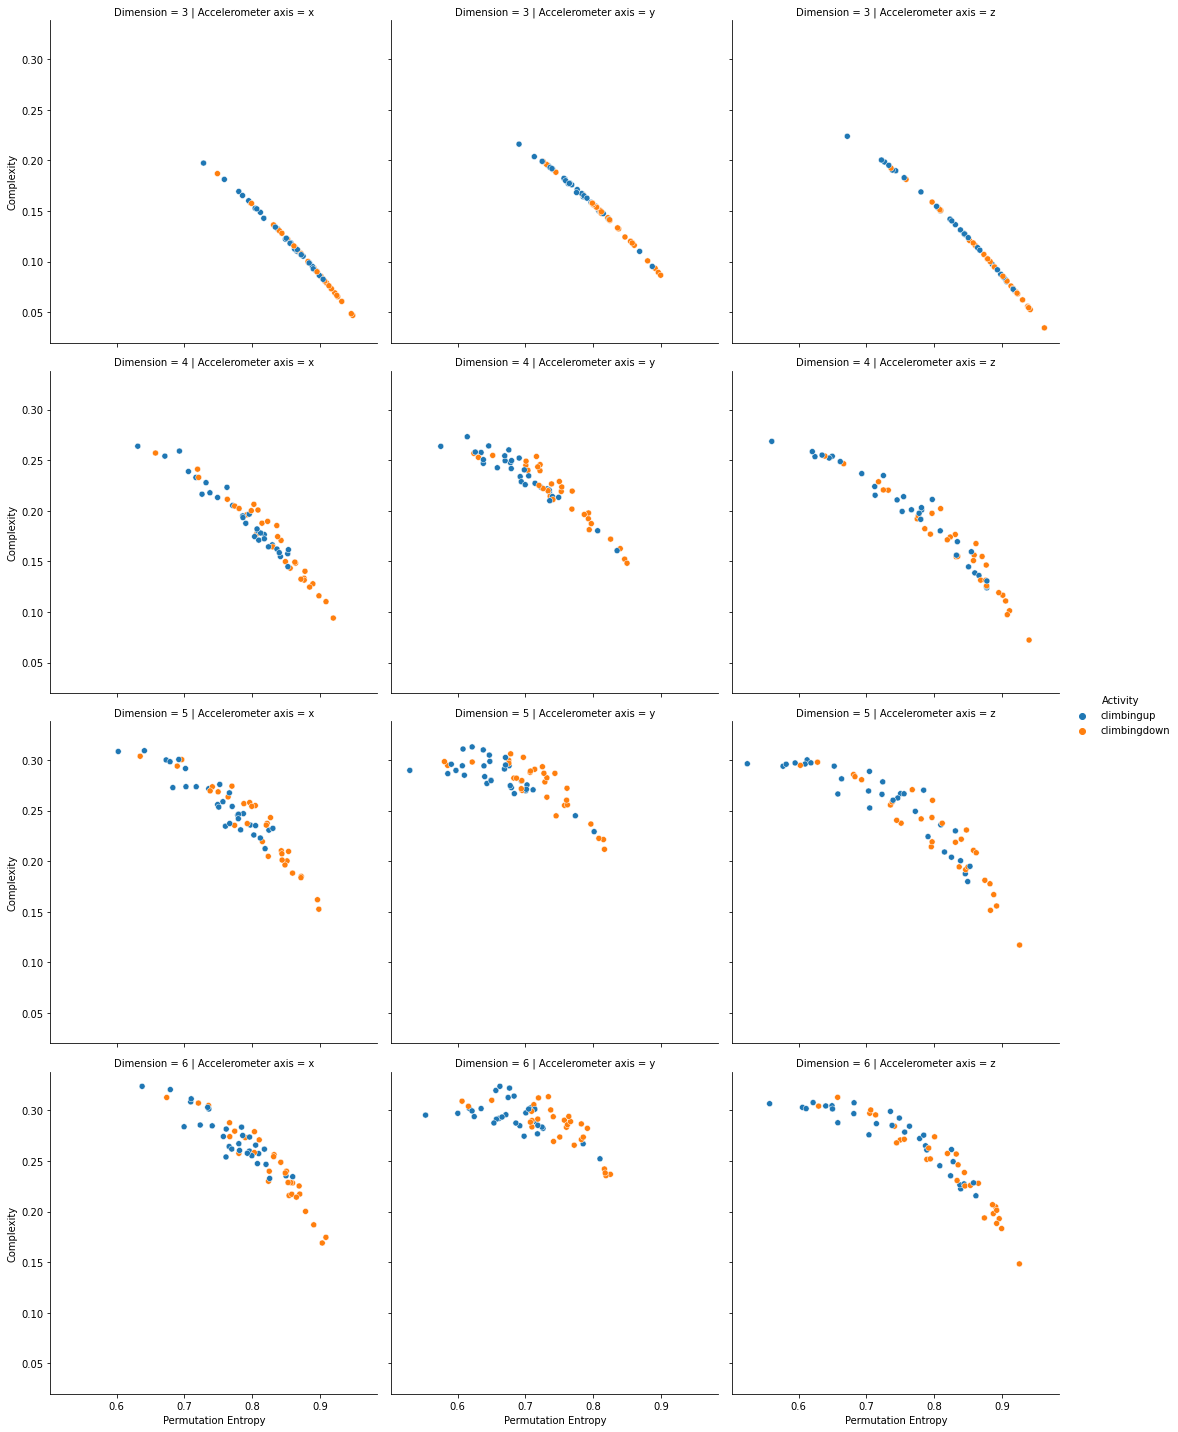

In [27]:
# Plotting graphs for the activities climbingdown and climbingup
up_dwn = results[(results['Activity']=='climbingdown') | (results['Activity']=='climbingup')]
up_dwn_data = up_dwn[(up_dwn['Signal Length']==4096) & (up_dwn['Delay']==1)]
sns.relplot(data=up_dwn_data,x='Permutation Entropy',y='Complexity',hue='Activity',col='Accelerometer axis',row='Dimension')
plt.show()